In [4]:
%load_ext autoreload
%autoreload 2
from multigrid.envs import ConstrainedEnv
import matplotlib.pyplot as plt

env = ConstrainedEnv(render_mode="rgb_array", agents=2)


state, info = env.reset()

self.max_steps=200


In [5]:
import torch

# Check if CUDA is available
cuda_available = torch.cuda.is_available()
print("CUDA Available: ", cuda_available)

CUDA Available:  False


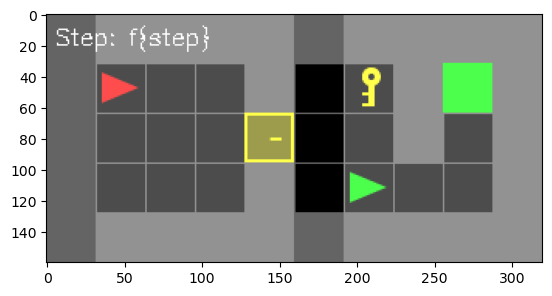

In [6]:
# Test a step and show environment is working

action = env.action_space.sample()
env.step(action)
img = env.render()
plt.imshow(img)
plt.show()


In [7]:
from DQN_multi_agent import *

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [9]:
n_actions = env.action_space[0].n
n_actions

7

In [10]:

import torch.nn as nn
import torch
import gymnasium as gym
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor
from typing import Dict
from features_extractor import MinigridFeaturesExtractor

n_actions = env.action_space[0].n
policy_network =  MinigridFeaturesExtractor(env.observation_space,  512).to(device)

: 

In [8]:
action = env.action_space.sample()
print(action)
keys  =list(action.keys())
second_key = keys[1]
second_item = (second_key, action[second_key])
second_item

OrderedDict([(0, 2), (1, 5)])


(1, 5)

In [9]:
env.observation_space.spaces[0]['image'].sample()[None]

array([[[[ 24, 112, 162],
         [  3, 127, 182],
         [159,  95, 187],
         [ 32,  80, 214],
         [ 63,  69, 143],
         [ 75, 234, 139],
         [ 79,  28, 237]],

        [[187, 235,  92],
         [141, 210,  82],
         [216,  52, 231],
         [ 26,   8, 139],
         [191, 113, 235],
         [193,  65, 180],
         [ 74,  60,  60]],

        [[ 44,  46, 230],
         [110,  70, 118],
         [ 13, 230, 164],
         [169, 242, 168],
         [190, 195,  75],
         [234, 244, 137],
         [  2, 142, 153]],

        [[119,  18, 142],
         [  1,  94,  34],
         [175, 104,  55],
         [107,  70, 109],
         [ 17, 113,   4],
         [ 28, 235, 162],
         [ 68, 132,  74]],

        [[174, 164, 130],
         [249, 120,  24],
         [ 71, 231, 195],
         [116, 120, 149],
         [ 36, 195, 156],
         [ 67, 129,  48],
         [245, 232, 141]],

        [[196,  55, 102],
         [ 32, 172, 231],
         [ 96,  20, 124],
  

In [10]:
agent = Agent(env)
agent.train(1,env)
print("we did it")

Dict(0: Dict('direction': Discrete(4), 'image': Box(0, 255, (7, 7, 3), int64), 'mission': MissionSpace('get to the green goal square, you rascal')), 1: Dict('direction': Discrete(4), 'image': Box(0, 255, (7, 7, 3), int64), 'mission': MissionSpace('get to the green goal square, you rascal')))
[[[ 88 182 101]
  [ 11 132  44]
  [ 39  51 128]
  [189 244  58]
  [104  38 157]
  [108 222 208]
  [234   2  83]]

 [[233  70 144]
  [147 125 118]
  [ 71  61 161]
  [239  18 156]
  [205 228  46]
  [  2 137 226]
  [129 254 154]]

 [[174 101 184]
  [116 248 172]
  [125  15 232]
  [ 85  31 255]
  [217  13 169]
  [125 132  27]
  [210  41 131]]

 [[ 30 219 192]
  [129 174 203]
  [172  73 212]
  [145 234 144]
  [ 42 102 248]
  [140 115 255]
  [248  76 153]]

 [[124 177  87]
  [205  56 108]
  [104 245 174]
  [183 255 123]
  [ 32 240 115]
  [ 82   3 178]
  [203 106  51]]

 [[217  88 107]
  [171  27 119]
  [ 33 127 183]
  [ 44 158 179]
  [153  72  33]
  [143  87   7]
  [ 11 153 133]]

 [[ 26   6 148]
  [ 18 

: 